In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv('StudentsPerformance.csv')
print(df.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [3]:
df.head()
print("Dineshkarthi S , 24BAD402")

Dineshkarthi S , 24BAD402


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df['final_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [6]:

df['study_hours'] = np.random.randint(1, 10, size=len(df))
df['attendance_pct'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(5, 9, size=len(df))

print(df[['study_hours', 'attendance_pct', 'sleep_hours']].mean())

# Encode the catagorical variables
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 1. Ordinal Encoding for Education
edu_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
ord_enc = OrdinalEncoder(categories=[edu_order])
df['parental level of education'] = ord_enc.fit_transform(df[['parental level of education']])

# 2. Label Encoding for Test Prep
le = LabelEncoder()
df['test preparation course'] = le.fit_transform(df['test preparation course'])

study_hours        4.899
attendance_pct    79.815
sleep_hours        6.508
dtype: float64


In [7]:
print(df.columns.tolist())
df.head()

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'final_score', 'study_hours', 'attendance_pct', 'sleep_hours']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final_score,study_hours,attendance_pct,sleep_hours
0,female,group B,4.0,standard,1,72,72,74,72.666667,9,87,8
1,female,group C,2.0,standard,0,69,90,88,82.333333,7,91,5
2,female,group B,5.0,standard,1,90,95,93,92.666667,9,97,6
3,male,group A,3.0,free/reduced,1,47,57,44,49.333333,3,74,6
4,male,group C,2.0,standard,1,76,78,75,76.333333,6,91,7


In [8]:
# Define the 5 input features (X)
features = [
    'study_hours', 
    'attendance_pct', 
    'parental level of education', 
    'test preparation course', 
    'sleep_hours'
]

X = df[features]

# Define the target variable (y)
y = df['final_score']

# Verify the selection
print("Selected Input Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Selected Input Features (X):
   study_hours  attendance_pct  parental level of education  \
0            9              87                          4.0   
1            7              91                          2.0   
2            9              97                          5.0   
3            3              74                          3.0   
4            6              91                          2.0   

   test preparation course  sleep_hours  
0                        1            8  
1                        0            5  
2                        1            6  
3                        1            6  
4                        1            7  

Target Variable (y):
0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: final_score, dtype: float64


In [22]:
from sklearn.impute import SimpleImputer

# 1. Select the columns to impute
numeric_cols = ['study_hours', 'attendance_pct', 'sleep_hours']
categorical_cols = ['parental level of education', 'test preparation course']

# 2. Handle Numeric Missing Values (Mean Imputation)
mean_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = mean_imputer.fit_transform(df[numeric_cols])

# 3. Handle Encoded Categorical Missing Values (Mode Imputation)
mode_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])

# Verify there are no missing values left
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
final_score                    0
study_hours                    0
attendance_pct                 0
sleep_hours                    0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize
scaler = StandardScaler()

# 2. Scale using the variable you already created
X_scaled = scaler.fit_transform(df[features])

# 3. Convert back to DF using the same variable for columns
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(X_scaled_df.head)

<bound method NDFrame.head of      study_hours  attendance_pct  parental level of education  \
0       1.569802        0.624951                     1.314742   
1       0.804232        0.972871                    -0.055495   
2       1.569802        1.494750                     1.999860   
3      -0.726909       -0.505788                     0.629624   
4       0.421446        0.972871                    -0.055495   
..           ...             ...                          ...   
995    -1.109694        0.016091                     1.999860   
996    -1.492479        1.233811                    -0.740613   
997    -0.726909        0.364011                    -0.740613   
998     0.421446        0.624951                    -0.055495   
999     0.038661        0.364011                    -0.055495   

     test preparation course  sleep_hours  
0                   0.746748     1.314685  
1                  -1.339140    -1.328783  
2                   0.746748    -0.447627  
3            

In [11]:
from sklearn.model_selection import train_test_split

# 1. Split the data
# test_size=0.2 means 20% of data goes to testing, 80% to training
# random_state=42 ensures you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 2. Check the "Shape" to see how many rows are in each
print(f"Total rows: {len(X_scaled_df)}")
print(f"Training rows: {len(X_train)}")
print(f"Testing rows: {len(X_test)}")

Total rows: 1000
Training rows: 800
Testing rows: 200


In [12]:
from sklearn.linear_model import LinearRegression

# 1. Initialize the Multilinear Regression model
model = LinearRegression()

# 2. Train the model (this is where the "learning" happens)
# The model looks for the mathematical relationship between your 5 features and the scores
model.fit(X_train, y_train)

# 3. Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

print("Model Training Complete!")

Model Training Complete!


In [13]:
# Create a DataFrame to see the weights assigned to each feature
importance = pd.DataFrame({'Feature': features, 'Weight': model.coef_})
print(importance.sort_values(by='Weight', ascending=False))

                       Feature    Weight
2  parental level of education  2.560431
0                  study_hours -0.352858
1               attendance_pct -0.396198
4                  sleep_hours -0.468544
3      test preparation course -3.766444


In [14]:
# Use the trained multilinear model to predict the final scores
y_pred = model.predict(X_test)

# Display the first 5 predictions
print("Predicted Scores:", y_pred[:5])

Predicted Scores: [67.4299247  72.47138323 69.69826557 64.61222762 72.92913614]


In [15]:
# Create a comparison table
comparison_df = pd.DataFrame({
    'Actual Score': y_test.values,
    'Predicted Score': y_pred
})

# Calculate the difference (Error)
comparison_df['Error'] = comparison_df['Actual Score'] - comparison_df['Predicted Score']

print(comparison_df.head())

   Actual Score  Predicted Score      Error
0     87.000000        67.429925  19.570075
1     64.000000        72.471383  -8.471383
2     75.000000        69.698266   5.301734
3     74.666667        64.612228  10.054439
4     81.666667        72.929136   8.737531


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 2. Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 3. Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MSE: 194.45702710066521
RMSE: 13.94478494279009
R² Score: 0.09287614144121736


In [17]:
# Create a summary table for interpretation
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Sort by absolute value to see the most influential features first
importance_df['Absolute_Influence'] = importance_df['Coefficient'].abs()
print(importance_df.sort_values(by='Absolute_Influence', ascending=False))

                       Feature  Coefficient  Absolute_Influence
3      test preparation course    -3.766444            3.766444
2  parental level of education     2.560431            2.560431
4                  sleep_hours    -0.468544            0.468544
1               attendance_pct    -0.396198            0.396198
0                  study_hours    -0.352858            0.352858


In [18]:
from sklearn.feature_selection import RFE

# Initialize the model
model = LinearRegression()

# Select the top 3 most important features out of your 5
selector = RFE(model, n_features_to_select=3)
selector = selector.fit(X_train, y_train)

# Check which features were kept
selected_features = X_train.columns[selector.support_]
print(f"Top Features: {selected_features.tolist()}")

Top Features: ['parental level of education', 'test preparation course', 'sleep_hours']


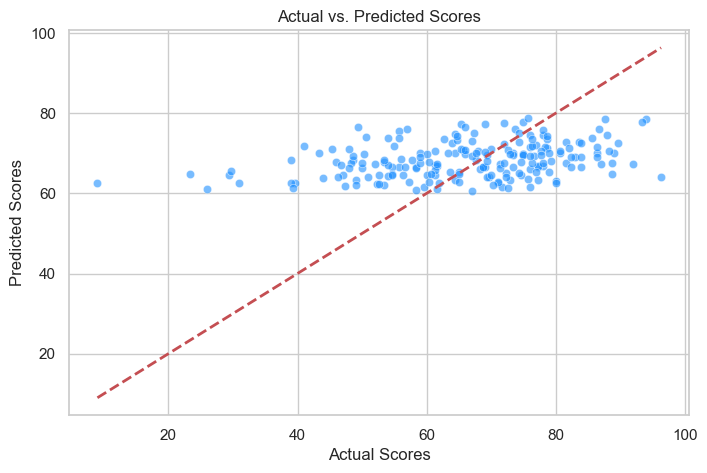

C:\Users\HP\AppData\Local\Temp\ipykernel_16536\3373061446.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df, palette='magma')


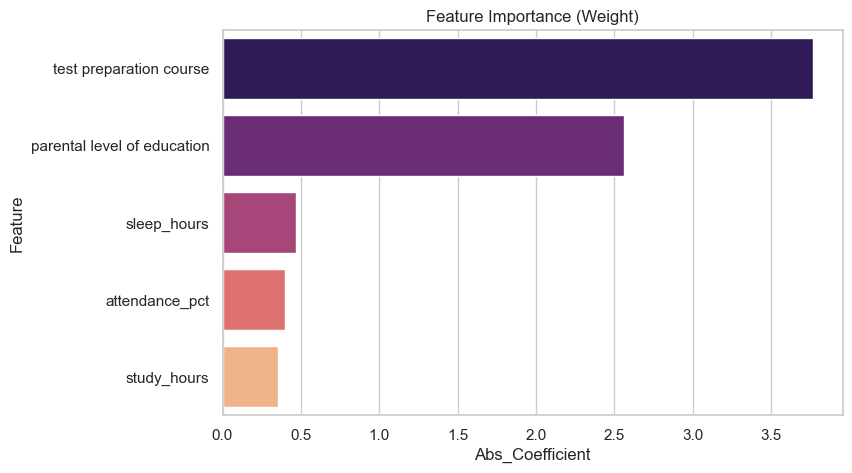

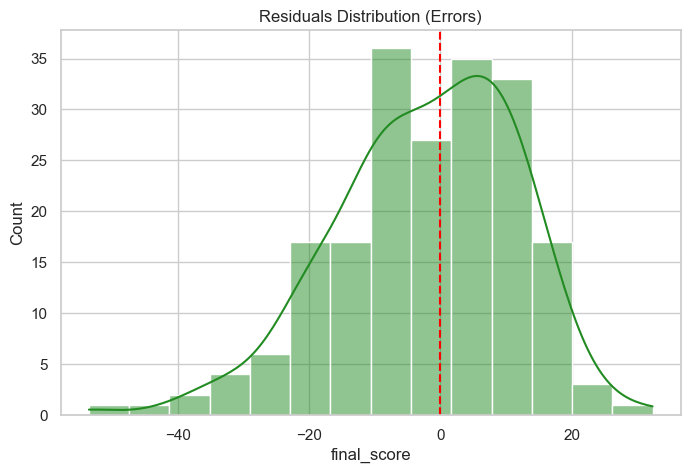

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the model is trained before accessing .coef_
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Set visual style
sns.set_theme(style="whitegrid")

# --- 1. Predicted vs. Actual Exam Scores ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

# --- 2. Coefficient Magnitude Comparison ---
# This is where your error was occurring
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df, palette='magma')
plt.title('Feature Importance (Weight)')
plt.show()

# --- 3. Residual Distribution Plot ---
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='forestgreen')
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution (Errors)')
plt.show()

In [20]:
#
#
#
#
#
#
#
#
#
#
#
#

In [23]:
import pandas as pd
import numpy as np 
df=pd.read_csv('auto-mpg.csv')
df.head()
print("Dineshkarthi S , 24BAD402")

Dineshkarthi S , 24BAD402


In [24]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [25]:
# Force '?' to become NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Now drop the rows that were coerced to NaN
df = df.dropna(subset=['horsepower'])

# Verify it worked
print(df['horsepower'].dtype)
df.info()
print(df.isnull().sum())

float64
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [26]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [27]:
# 1. Convert horsepower to numeric, forcing errors to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# 2. Remove rows where horsepower is missing
df_clean = df.dropna(subset=['horsepower'])

# 3. Define your independent variable (X)
X = df_clean[['horsepower']]
y = df_clean['mpg']
print(f"Shape of independent variable X: {X.shape}")
print(f"Missing values in X: {X.isnull().sum().values[0]}")

Shape of independent variable X: (392, 1)
Missing values in X: 0


In [28]:

from sklearn.preprocessing import PolynomialFeatures


# 2. Reshape horsepower for scikit-learn (requires a 2D array)
X = df_clean[['horsepower']]

# 3. Generate Polynomial Features
degrees = [2, 3, 4]
poly_results = {}

for d in degrees:
    # include_bias=False excludes the column of 1s (intercept term)
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Create descriptive column names
    col_names = [f'horsepower^{i}' for i in range(1, d + 1)]
    poly_results[d] = pd.DataFrame(X_poly, columns=col_names, index=df_clean.index)

# Example: Display the first few rows of the degree 3 features
print("Degree 3 Features:")
print(poly_results[3].head())

Degree 3 Features:
   horsepower^1  horsepower^2  horsepower^3
0         130.0       16900.0     2197000.0
1         165.0       27225.0     4492125.0
2         150.0       22500.0     3375000.0
3         150.0       22500.0     3375000.0
4         140.0       19600.0     2744000.0


In [29]:
from sklearn.preprocessing import StandardScaler

# Dictionary to store scaled features
scaled_features_dict = {}
scaler = StandardScaler()

for degree, data in poly_results.items():
    # Fit and transform the polynomial data
    scaled_data = scaler.fit_transform(data)
    
    # Convert back to a DataFrame to keep it organized
    scaled_features_dict[degree] = pd.DataFrame(
        scaled_data, 
        columns=data.columns, 
        index=data.index
    )

# Verification: Mean should be ~0 and Std should be ~1
print(f"Degree 4 Scaled Mean:\n{scaled_features_dict[4].mean().round(2)}")
print(f"\nDegree 4 Scaled Std:\n{scaled_features_dict[4].std().round(2)}")

Degree 4 Scaled Mean:
horsepower^1   -0.0
horsepower^2   -0.0
horsepower^3    0.0
horsepower^4    0.0
dtype: float64

Degree 4 Scaled Std:
horsepower^1    1.0
horsepower^2    1.0
horsepower^3    1.0
horsepower^4    1.0
dtype: float64


In [30]:
from sklearn.model_selection import train_test_split

# We use the clean 'mpg' as our target variable (y)
y = df_clean['mpg']

# Dictionary to store the split data for each degree
splits = {}

for degree, X_scaled in scaled_features_dict.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    
    splits[degree] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# Check the size of the split
print(f"Training set size: {len(splits[2]['X_train'])} rows")
print(f"Testing set size: {len(splits[2]['X_test'])} rows")

Training set size: 313 rows
Testing set size: 79 rows


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store the trained models and their results
models = {}
results = []

for degree, data in splits.items():
    # Initialize the Linear Regression model
    model = LinearRegression()
    
    # Train (fit) the model on the training set
    model.fit(data['X_train'], data['y_train'])
    
    # Predict on the test set
    y_pred = model.predict(data['X_test'])
    
    # Calculate metrics
    mse = mean_squared_error(data['y_test'], y_pred)
    r2 = r2_score(data['y_test'], y_pred)
    
    # Store for comparison
    models[degree] = model
    results.append({'Degree': degree, 'MSE': mse, 'R2 Score': r2})

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results).set_index('Degree')
print(results_df)


              MSE  R2 Score
Degree                     
2       18.416968  0.639170
3       18.460267  0.638322
4       18.268227  0.642084


In [32]:


# Create a container for our final comparison
comparison_df = pd.DataFrame({'Actual MPG': splits[2]['y_test'].values})

for degree, model in models.items():
    # Use the specific test set for this degree
    X_test_scaled = splits[degree]['X_test']
    
    # Generate predictions
    predictions = model.predict(X_test_scaled)
    
    # Add to comparison table
    comparison_df[f'Degree {degree} Prediction'] = predictions

# Display the first 10 rows to compare accuracy
print(comparison_df.head(10).round(2))

   Actual MPG  Degree 2 Prediction  Degree 3 Prediction  Degree 4 Prediction
0        26.0                30.95                30.99                31.07
1        21.6                19.63                19.54                19.41
2        36.1                33.81                34.07                34.02
3        26.0                30.65                30.67                30.75
4        27.0                26.13                25.96                26.03
5        28.0                29.16                29.10                29.20
6        13.0                13.28                13.64                13.80
7        26.0                29.16                29.10                29.20
8        19.0                23.88                23.69                23.70
9        29.0                37.58                38.25                37.86


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

evaluation_metrics = []

for degree in [2, 3, 4]:
    # Get the test data and model for this degree
    X_test = splits[degree]['X_test']
    y_test = splits[degree]['y_test']
    model = models[degree]
    
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    r2 = r2_score(y_test, y_pred)
    
    evaluation_metrics.append({
        'Degree': degree,
        'MSE': round(mse, 3),
        'RMSE': round(rmse, 3),
        'R2 Score': round(r2, 4)
    })

# Display as a DataFrame
results_df = pd.DataFrame(evaluation_metrics).set_index('Degree')
print(results_df)

           MSE   RMSE  R2 Score
Degree                         
2       18.417  4.291    0.6392
3       18.460  4.297    0.6383
4       18.268  4.274    0.6421


In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Use the Degree 4 scaled data
X_train = splits[4]['X_train']
X_test = splits[4]['X_test']
y_train = splits[4]['y_train']
y_test = splits[4]['y_test']

# 2. Initialize Ridge with an alpha value (e.g., 1.0)
ridge_model = Ridge(alpha=1.0)

# 3. Fit and Predict
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# 4. Evaluate
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge (Degree 4) MSE: {ridge_mse:.3f}")
print(f"Ridge (Degree 4) R2: {ridge_r2:.3f}")

Ridge (Degree 4) MSE: 18.306
Ridge (Degree 4) R2: 0.641


In [35]:
# Compare standard Linear Regression coefficients vs Ridge
print("Standard Linear Degree 4 Coeffs:", models[4].coef_)
print("Ridge Degree 4 Coeffs:", ridge_model.coef_)

Standard Linear Degree 4 Coeffs: [-13.70284071  -9.46554405  31.6479047  -14.60919456]
Ridge Degree 4 Coeffs: [-12.00045709   0.87053473   4.45383988   0.96815784]


E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


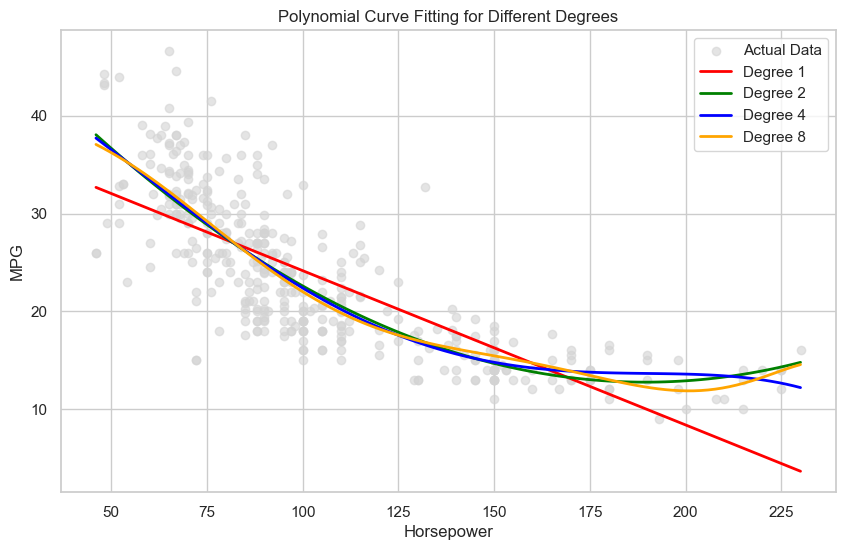

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Prepare data (ensure X is 2D and y is 1D)
# Assuming df_clean is your cleaned dataframe
X_plot = df_clean[['horsepower']]
y_plot = df_clean['mpg']

# 2. Create a smooth range of horsepower values for a clean curve
hp_range = np.linspace(X_plot.min(), X_plot.max(), 100).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X_plot, y_plot, color='lightgray', label='Actual Data', alpha=0.6)

# 3. Fit and plot degrees 1, 2, 4, and 8
degrees = [1, 2, 4, 8]
colors = ['red', 'green', 'blue', 'orange']

for degree, color in zip(degrees, colors):
    # Transform
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_plot)
    hp_poly = poly.transform(hp_range)
    
    # Train
    model = LinearRegression()
    model.fit(X_poly, y_plot)
    
    # Predict and Plot
    y_range_pred = model.predict(hp_poly)
    plt.plot(hp_range, y_range_pred, color=color, label=f'Degree {degree}', linewidth=2)

plt.title('Polynomial Curve Fitting for Different Degrees')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

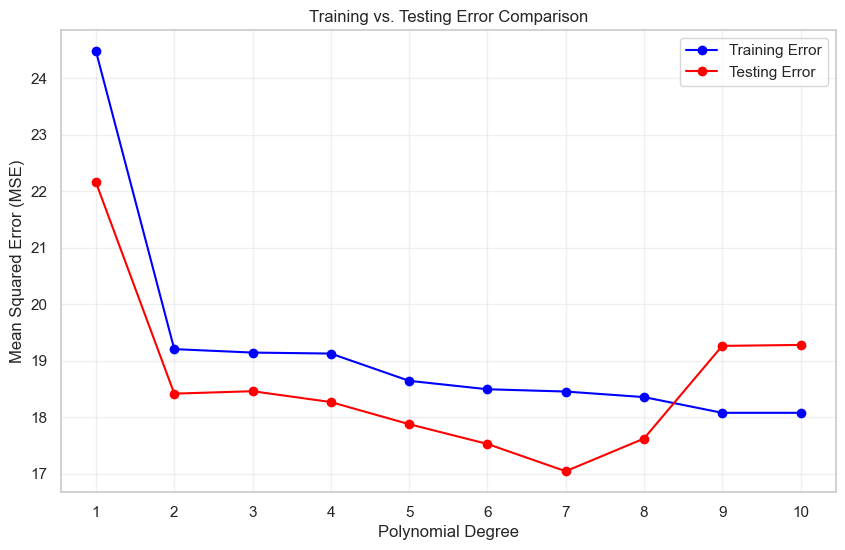

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Initialize lists to store errors
degrees = range(1, 11)  # Checking degrees 1 through 10
train_errors = []
test_errors = []

for d in degrees:
    # 2. Generate Polynomial Features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X) # X is the original cleaned horsepower column
    
    # 3. Split the data (using same random_state for consistency)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    # 4. Scale the features (Essential as degrees increase)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 5. Train Model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # 6. Calculate MSE for both sets
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_scaled)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_scaled)))

# 7. Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o', color='blue')
plt.plot(degrees, test_errors, label='Testing Error', marker='o', color='red')

plt.title('Training vs. Testing Error Comparison')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(degrees)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


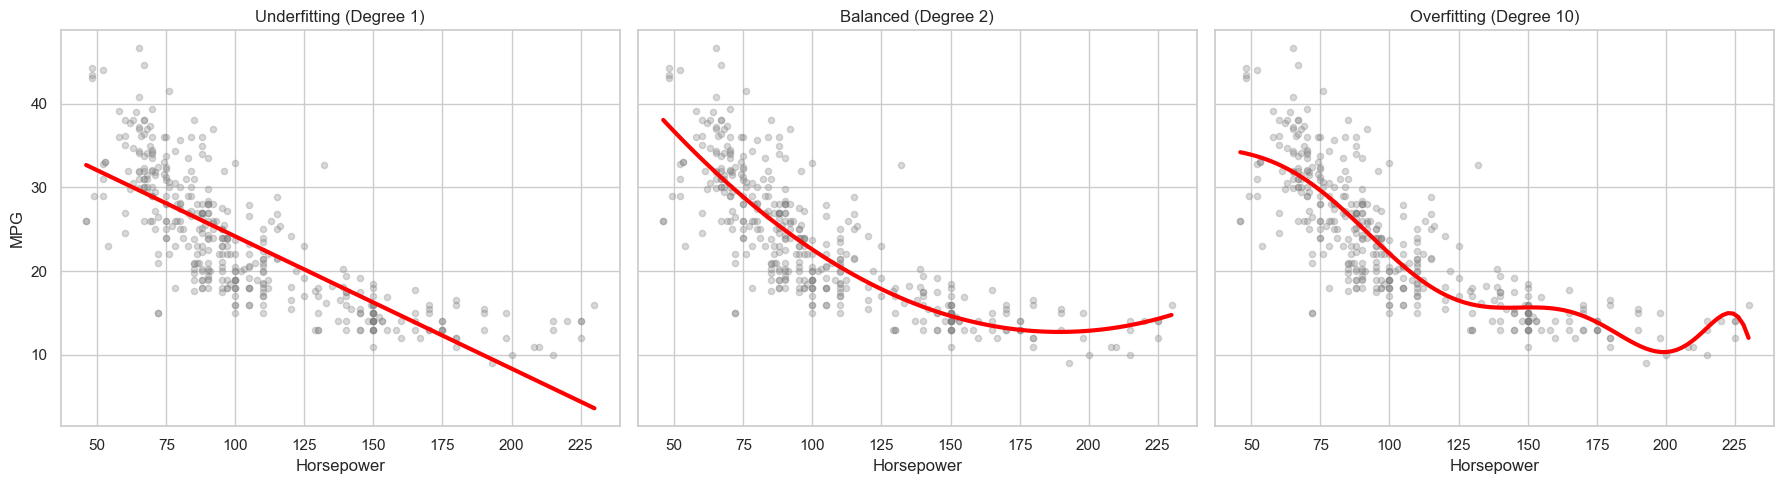

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup plotting area
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
degrees = [1, 2, 10]
titles = ['Underfitting (Degree 1)', 'Balanced (Degree 2)', 'Overfitting (Degree 10)']

# Generate a range for the curve
hp_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for i, degree in enumerate(degrees):
    # Transform
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    hp_poly = poly.transform(hp_range)
    
    # Train
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Plot
    axes[i].scatter(X, y, color='gray', alpha=0.3, s=20)
    axes[i].plot(hp_range, model.predict(hp_poly), color='red', linewidth=3)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Horsepower')
    if i == 0: axes[i].set_ylabel('MPG')

plt.tight_layout()
plt.show()